In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Loading the dataset using pickle
training_data = pickle.load(open("data/train.pkl", "rb"))
test_data = pickle.load(open("data/test.pkl", "rb"))

In [3]:
training_data.shape

(8000, 2)

In [4]:
test_data.shape

(80, 2)

In [5]:
np.random.shuffle(training_data)
train_data = np.split(training_data,16)
x_test,y_test = np.split(test_data,2,axis=1)

In [6]:
#training set divided into 16 equal parts randomly,
print("Total Number of Splitted Dataset : ",len(train_data))
for i in train_data:
    print(len(i), end=',')

Total Number of Splitted Dataset :  16
500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,

In [10]:
# For Ploting graphs
graph_data = { 'degree': [], 'bias_square': [], 'variance': [], 'irreducible_error': [], 'total_error': []}
# Table data
table_data = { 'variance':[], 'bias':[], 'irreducible_error':[], 'total_error': []}

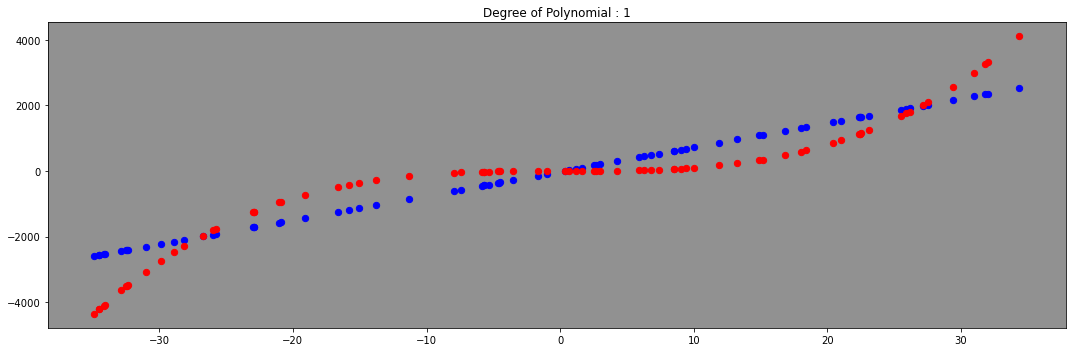

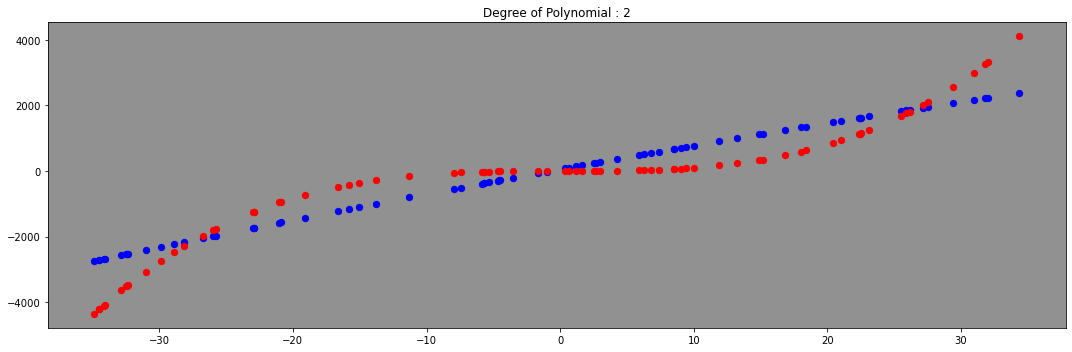

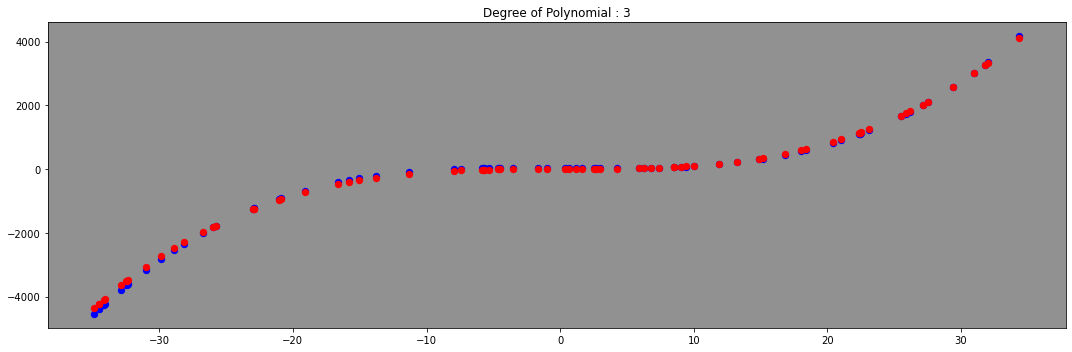

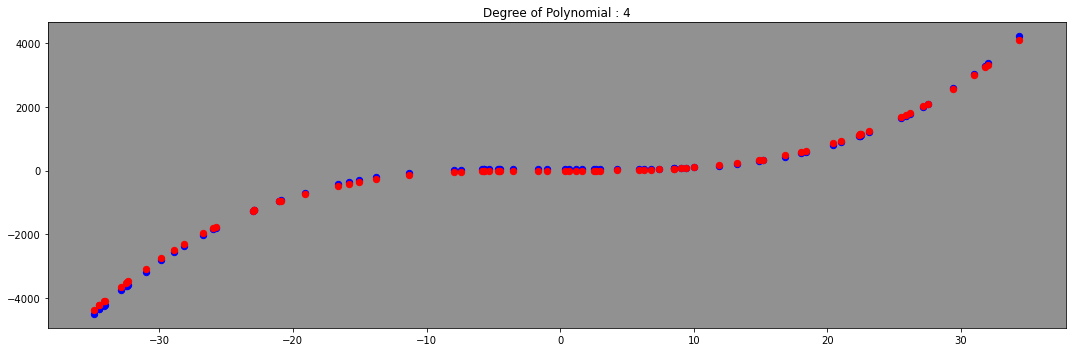

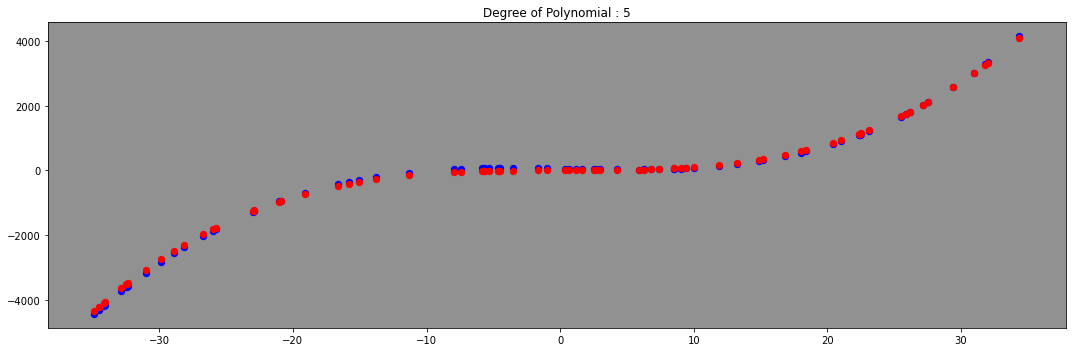

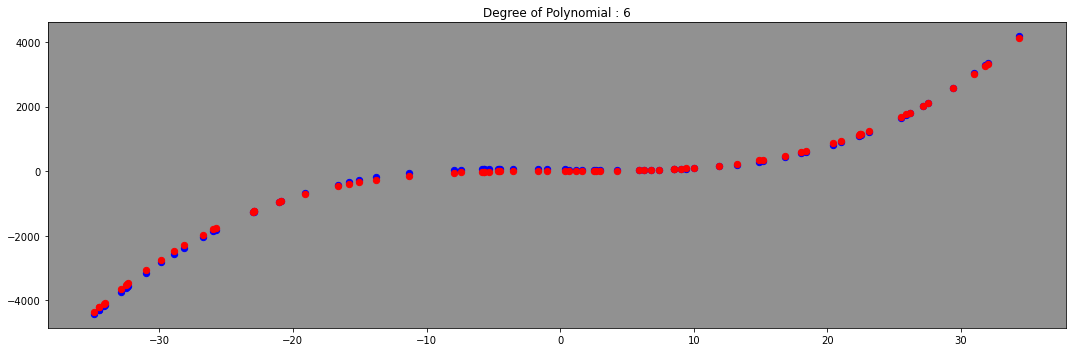

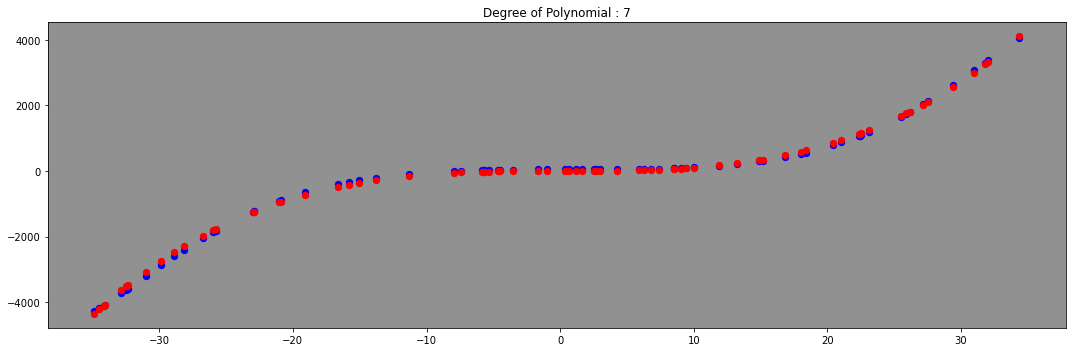

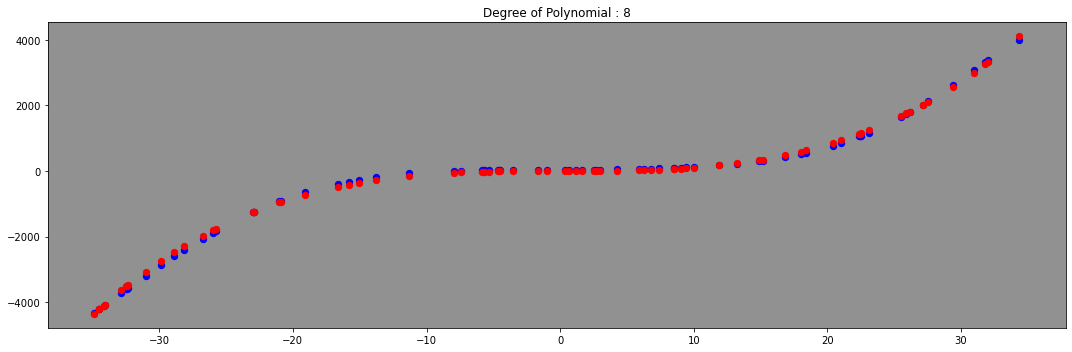

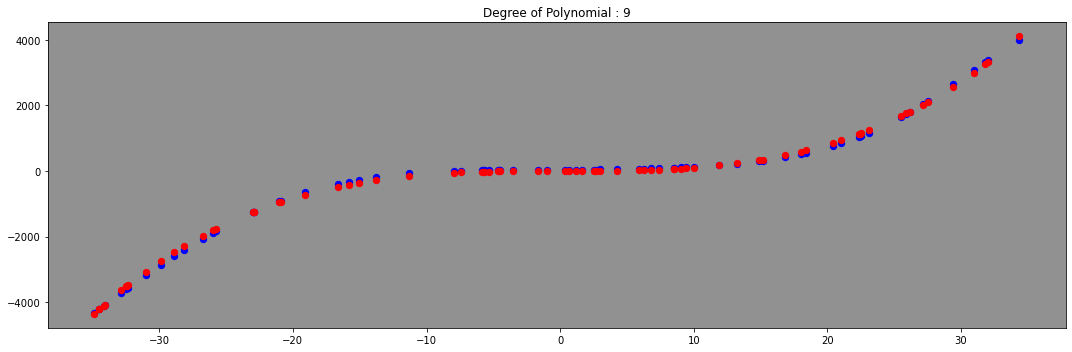

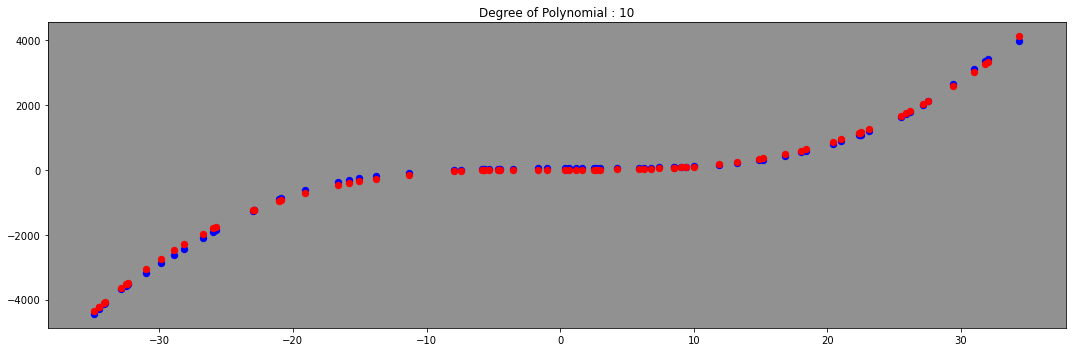

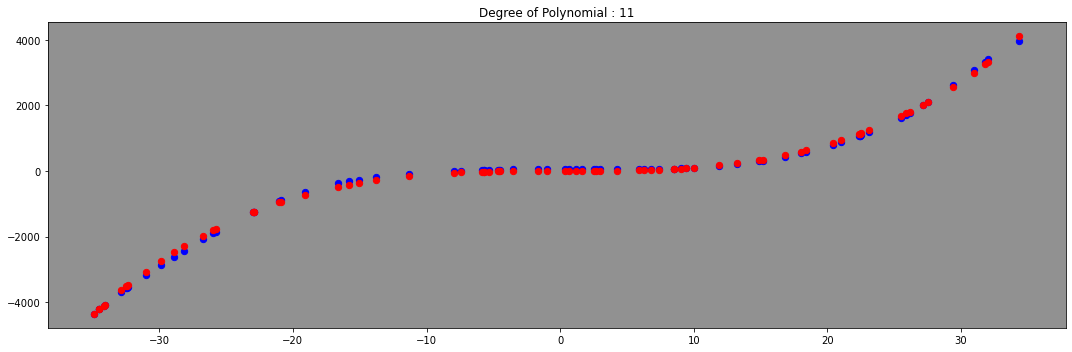

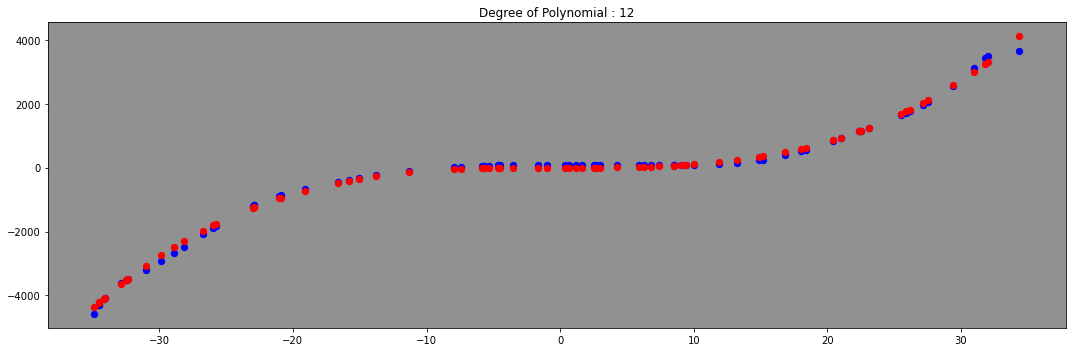

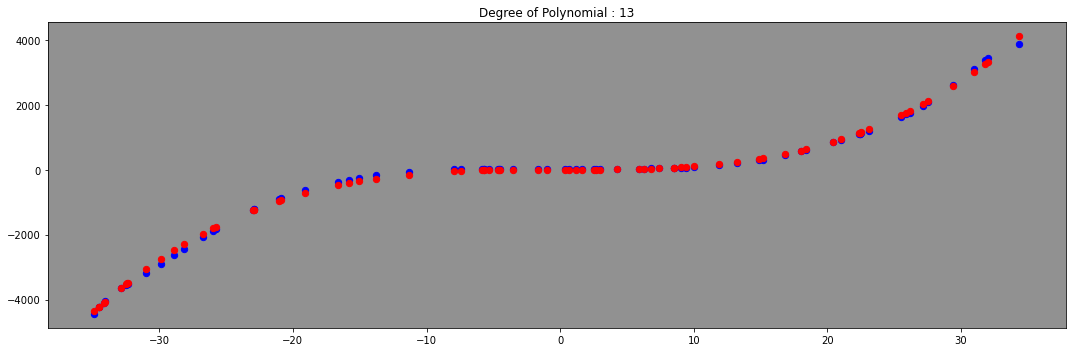

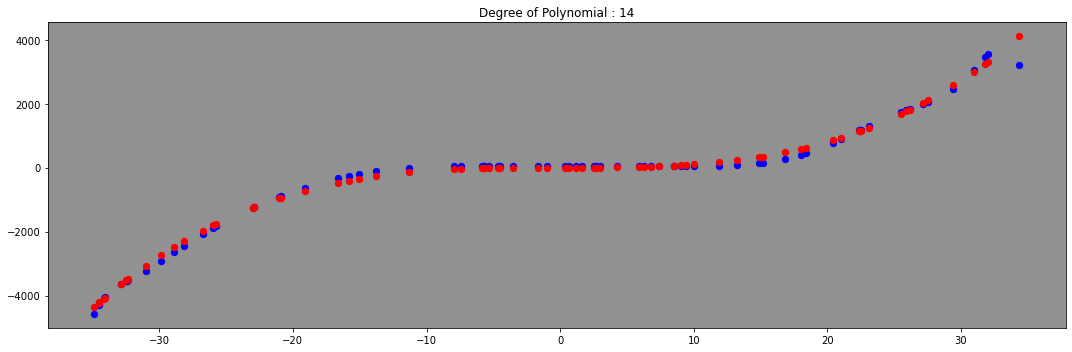

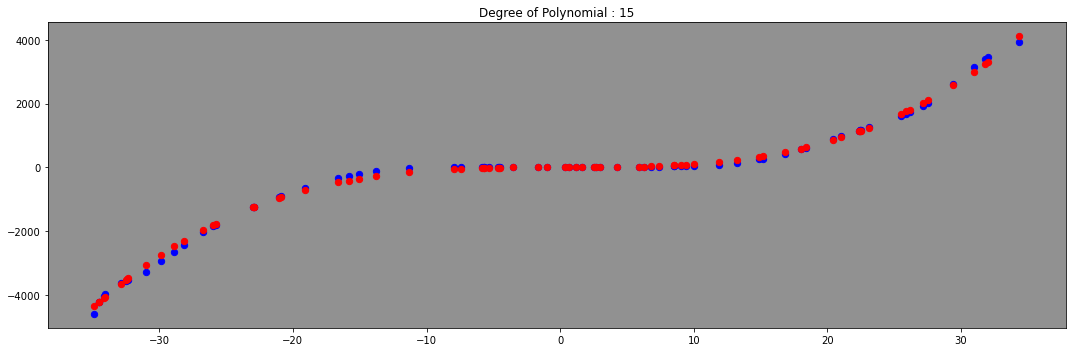

In [15]:
try :
    for poly_degree in range(1,16):
        # predictions matrix with all zero values
        predictions = np.zeros((80,1))
        poly_reg = PolynomialFeatures(degree=poly_degree)
        check = 1
        for data in train_data:
            # Splitting up the training set in x and y values
            X,Y = np.split(data,2,axis=1)
            
            # fits to the data and then transforms it
            X_poly = poly_reg.fit_transform(X)
            X_test_poly = poly_reg.fit_transform(x_test)
            
            # Linear Regression model on a training set
            linReg = LinearRegression(n_jobs = -1)
            model = linReg.fit(X_poly,Y)
            
            # predictions for the test set on the trained model
            array_test = model.predict(X_test_poly)
            
            # For the first iteration, setting predictions matrix as array_test
            # For furthur iterations appending the obtained  
            if check == 1:
                predictions = predictions + array_test
                check = 0
            else:
                predictions = np.append(predictions, array_test, axis = 1)

        # Calculating mean value of all predictions for a value of x in test data
        mean_value = np.mean(predictions,axis = 1)
        
#         print(mean_value.ndim)
        # After resizing mean_value is a column matrix containing
        # mean of predicted values for each x in test dataset
        # resizing in 2d 
        mean_value.resize((80,1))
        
        # For each degree, plotting mean of predicted and Actual values
        plt.figure(figsize=(15,5),facecolor ='white')
        plt.axes().set_facecolor("#919191")
        plt.title('Degree of Polynomial : '+ str(poly_degree))
        plt.scatter(x_test, mean_value, label = 'Predicted',color = 'blue', s = 40)
        plt.scatter(x_test,y_test, label = 'Actual',color = 'red', s = 40)
        plt.tight_layout()

        # bias for each x in testing set
        bias = mean_value - y_test
       # print(bias)

        # Square mean of bias values
        bias_square = np.mean((bias**2))

        # Bias value for each degree 
        final_bias = np.mean(np.abs(bias))
        
        # Storing bias for tabulating
        table_data['bias'].append(final_bias)

        # variance for each x in test set
        temp_variable = (predictions - mean_value)
        variance = np.mean((temp_variable**2),axis=1)
        variance.resize((80,1))

        # Variance value for each degree 
        final_variance = np.mean(variance)
        # Storing variance for tabulating
        table_data['variance'].append(final_variance)

        # irreducible error for each x in testing set
        temp_variable_two = (y_test - predictions)
        irreducible_error = np.mean((temp_variable_two**2), axis = 1)
        irreducible_error.resize((80,1))
        error = irreducible_error - ( bias**2 + variance)

        # irreducible error for each degree
        error_final = np.mean(error)

        # irreducible error 
        table_data['irreducible_error'].append(error_final)
        # Storing total error for tabulating
        table_data['total_error'].append(bias_square + final_variance + error_final)
        
        # plot graphs
        graph_data['total_error'].append(bias_square + final_variance + error_final)
        graph_data['degree'].append(poly_degree)
        graph_data['bias_square'].append(bias_square)
        graph_data['variance'].append(final_variance)
        graph_data['irreducible_error'].append(error_final) 
except Exception as e:
    print("An Error Occured while running : ", str(e))

In [12]:
# tabulate the value of bias and variance

df = pd.DataFrame(data=table_data, index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
df.head(15)

,variance,bias,irreducible_error,total_error
1,24304.247629,573.527011,3.494733e-11,516509.612542
2,42567.419339,566.986839,-3.183231e-11,510457.059938
3,47092.248700,45.715098,3.183231e-13,51124.458606
4,62140.903100,51.273917,-3.228706e-12,65924.996984
5,80932.138891,47.038372,-2.410161e-12,84049.269289
6,91145.726202,45.951777,2.273737e-13,94066.068273
7,129902.206751,51.871603,-3.865352e-12,133423.179986
8,144972.587572,51.401744,-1.182343e-12,148478.334082
9,159870.043663,51.837237,-1.546141e-12,163440.005619
10,181581.235221,54.476802,-2.819434e-12,185539.965123


<ipython-input-13-1dbd0ab3ea72>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor("#1CC4AF")


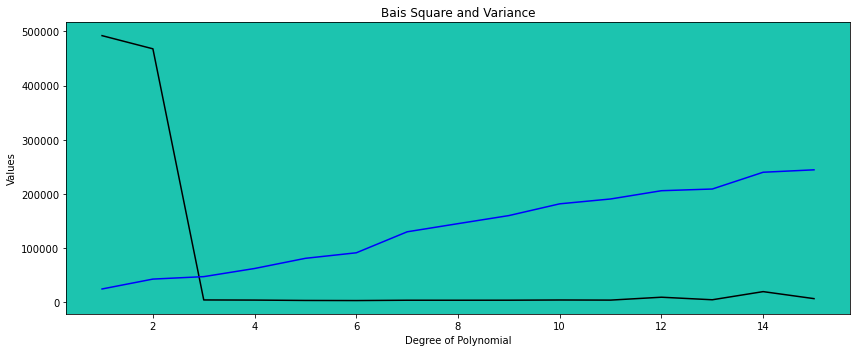

In [13]:
# Bias square and Variance graph
plt.figure(figsize=(12,5),facecolor='white')
plt.title("Bais Square and Variance")
plt.axes().set_facecolor("#1CC4AF")
plt.plot(graph_data['degree'], graph_data['bias_square'], label='Bias Square', color='black')
plt.plot(graph_data['degree'], graph_data['variance'], label='Variance', color='blue')
plt.xlabel("Degree of Polynomial")
plt.ylabel('Values')
plt.tight_layout()